# Cardiovascular disease prediction using RandomForest 

### 1.Importing python libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.ensemble import RandomForestClassifier

### 2.Load the dataset using pandas

In [13]:
df=pd.read_csv('documents/cardiovasc.csv')

### 3.Data preprocessing(No missing values)

In [14]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,19425.466667,1.366667,164.455333,74.629533,126.766667,92.504000,1.393333,1.244000,0.091333,0.052667,0.783333,0.496000
std,2513.921717,0.482055,8.207857,15.066064,17.554230,101.536925,0.701629,0.590505,0.288179,0.223442,0.412111,0.500151
min,14307.000000,1.000000,76.000000,41.000000,11.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17539.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19666.500000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21305.500000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23661.000000,2.000000,198.000000,200.000000,220.000000,1100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### 4.Correlation matrix

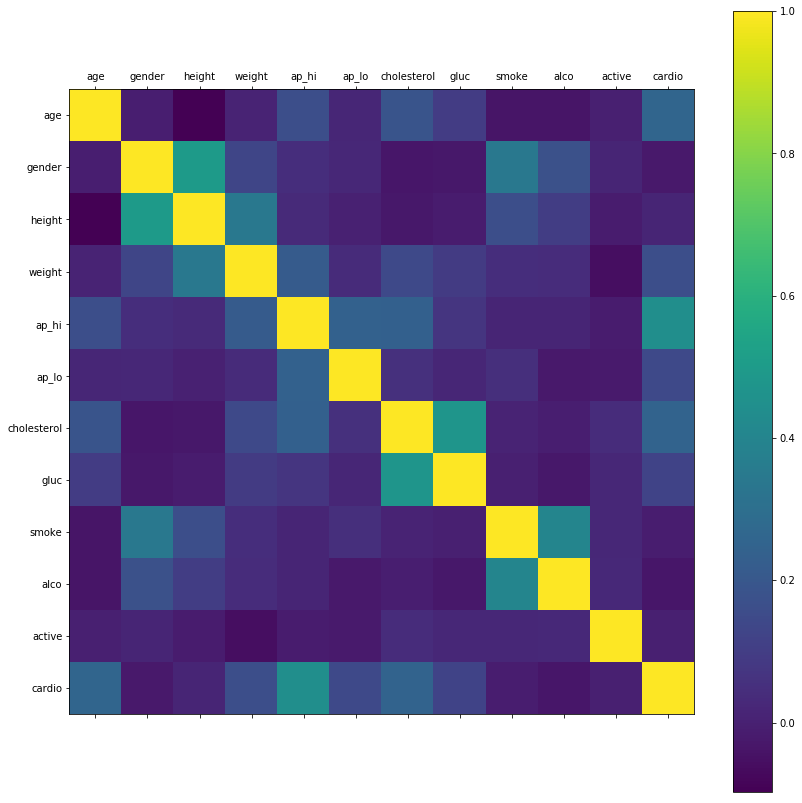

In [16]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

### 5.Counts of each target class

Text(0.5, 1.0, 'Count of each Target Class')

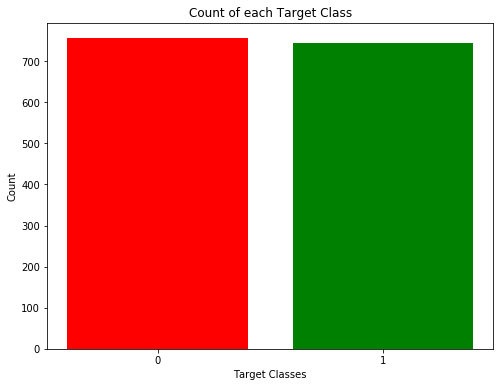

In [17]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['cardio'].unique(), df['cardio'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### 6.Split the data into train and test using sklearn

In [18]:
y = df['cardio']
X = df.drop(['cardio'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### 7.Fit the model using Randomforest

In [19]:
rf_scores = []
estimators = [10,  1000,  2000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

##### plotting the graph

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

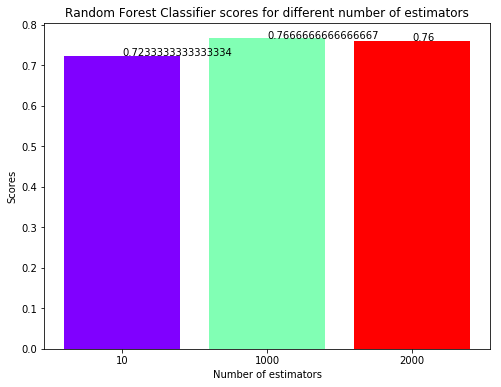

In [20]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

### 8.Predict targets for test dataset

In [21]:
y_pred=rf_classifier.predict(X_test)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision",metrics.precision_score(y_test,y_pred))
print("Recall",metrics.recall_score(y_test,y_pred))


Accuracy: 0.76
Precision 0.7880794701986755
Recall 0.7484276729559748


### 9.Describing the performance of model using confusion matrix

In [23]:
c=confusion_matrix(y_test,y_pred)

In [24]:
c

array([[109,  32],
       [ 40, 119]], dtype=int64)

### 10.Prediction on new features

In [34]:
b=rf_classifier.predict([[14400,1,153,70,120,70,1,1,0,0,1]])

In [35]:
b

array([0], dtype=int64)

In [36]:
if(b==1):
    print("person is suffering from cardiovascular disease!!!!!!")
else:
    print("person is not suffering from cardiovascular disease!!!!!!")
    



person is not suffering from cardiovascular disease!!!!!!
